# Financial Data Analysis with Python - a Deep Dive

## Installing required Libraries/Packages

pip install yfinance

(first: conda update anaconda) 

## Loading Financial Data from the Web

In [17]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Access the PROJECT_PATH variable
project_files = os.getenv("PROJECT_FILES_PT2")

In [1]:
import pandas as pd

In [2]:
import yfinance as yf

In [3]:
start = "2014-10-01"
end = "2021-05-31"

In [4]:
symbol = "BA"

Note: From yfinance version 0.2.48, loading one symbol with yf.download() will lead to a Multi Level Index. <br>
To avoid this, set multi_level_index=False 

In [5]:
yf.__version__ # check your version

'0.2.54'

In [6]:
df = yf.download(symbol, start, end) # creates a Multi Level Index (from yfinance 0.2.48)
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BA,BA,BA,BA,BA
Date,,,,,
2014-10-01,108.406677,110.754464,108.093639,110.754464,5265200
2014-10-02,107.971916,109.171898,107.684963,108.171915,3204500
2014-10-03,109.876205,110.319677,108.397975,108.397975,3075900
2014-10-06,109.789238,110.597919,109.024031,110.510958,2681000
2014-10-07,107.232780,109.145786,107.206695,109.145786,3554900
...,...,...,...,...,...
2021-05-24,237.440002,238.500000,232.600006,235.139999,10106000
2021-05-25,240.740005,243.779999,239.229996,240.000000,12908000


In [7]:
df = yf.download(symbol, start, end, multi_level_index=False) # avoids Multi Level Index (from yfinance 0.2.48)
df

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2014-10-01,108.406677,110.754464,108.093639,110.754464,5265200
2014-10-02,107.971916,109.171898,107.684963,108.171915,3204500
2014-10-03,109.876205,110.319677,108.397975,108.397975,3075900
2014-10-06,109.789238,110.597919,109.024031,110.510958,2681000
2014-10-07,107.232780,109.145786,107.206695,109.145786,3554900
...,...,...,...,...,...
2021-05-24,237.440002,238.500000,232.600006,235.139999,10106000
2021-05-25,240.740005,243.779999,239.229996,240.000000,12908000
2021-05-26,241.369995,242.490005,239.869995,241.699997,7240200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1677 entries, 2014-10-01 to 2021-05-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1677 non-null   float64
 1   High    1677 non-null   float64
 2   Low     1677 non-null   float64
 3   Open    1677 non-null   float64
 4   Volume  1677 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.6 KB


In [9]:
symbol = ["BA", "MSFT", "^DJI", "EURUSD=X", "GC=F", "BTC-USD"]

Ticker Symbols: <br>
- __BA__: Boeing (US Stock) 
- __MSFT__: Microsoft Corp (US Stock)
- __^DJI__: Dow Jones Industrial Average (US Stock Index)
- __EURUSD=X__: Exchange Rate for Currency Pair EUR/USD (Forex)
- __GC=F__: Gold Price (Precious Metal / Commodity)
- __BTC-USD__: Bitcoin in USD (Cryptocurrency)

In [12]:
df = yf.download(symbol, start, end)
df

[                       0%                       ]

[*********************100%***********************]  6 of 6 completed


Price            Close                                                   \
Ticker              BA       BTC-USD  EURUSD=X         GC=F        MSFT   
Date                                                                      
2014-10-01  108.406677    383.614990  1.262834  1214.599976   39.166973   
2014-10-02  107.971916    375.071991  1.262419  1214.199951   39.047512   
2014-10-03  109.876205    359.511993  1.267058  1192.199951   39.329105   
2014-10-04         NaN    328.865997       NaN          NaN         NaN   
2014-10-05         NaN    320.510010       NaN          NaN         NaN   
...                ...           ...       ...          ...         ...   
2021-05-26  241.369995  39294.199219  1.224909  1901.300049  244.217300   
2021-05-27  250.699997  38436.968750  1.219260  1895.699951  242.100357   
2021-05-28  247.020004  35697.605469  1.219319  1902.500000  242.459641   
2021-05-29         NaN  34616.066406       NaN          NaN         NaN   
2021-05-30         NaN  35678.128906       NaN          NaN         NaN   

Price                           High                                       \
Ticker              ^DJI          BA       BTC-USD  EURUSD=X         GC=F   
Date                                                                        
2014-10-01  16804.710938  110.754464    391.378998  1.263999  1217.800049   
2014-10-02  16801.050781  109.171898    385.497009  1.269050  1219.500000   
2014-10-03  17009.689453  110.319677    377.695007  1.266994  1212.400024   
2014-10-04           NaN         NaN    364.487000       NaN          NaN   
2014-10-05           NaN         NaN    341.800995       NaN          NaN   
...                  ...         ...           ...       ...          ...   
2021-05-26  34323.050781  242.490005  40782.078125  1.226500  1901.300049   
2021-05-27  34464.640625  252.600006  40379.617188  1.221699  1903.900024   
2021-05-28  34529.449219  248.979996  38856.968750  1.220107  1905.400024   
2021-05-29           NaN         NaN  37234.500000       NaN          NaN   
2021-05-30           NaN         NaN  36400.667969       NaN          NaN   

Price       ...      Open                                             Volume  \
Ticker      ...  EURUSD=X         GC=F        MSFT          ^DJI          BA   
Date        ...                                                                
2014-10-01  ...  1.262913  1207.699951   39.482697  17040.460938   5265200.0   
2014-10-02  ...  1.262499  1215.300049   39.107247  16808.269531   3204500.0   
2014-10-03  ...  1.266994  1212.400024   39.235241  16802.199219   3075900.0   
2014-10-04  ...       NaN          NaN         NaN           NaN         NaN   
2014-10-05  ...       NaN          NaN         NaN           NaN         NaN   
...         ...       ...          ...         ...           ...         ...   
2021-05-26  ...  1.224890  1901.300049  244.159023  34336.339844   7240200.0   
2021-05-27  ...  1.219036  1896.800049  243.906569  34432.468750  18404400.0   
2021-05-28  ...  1.219274  1897.500000  243.741475  34558.500000  11197400.0   
2021-05-29  ...       NaN          NaN         NaN           NaN         NaN   
2021-05-30  ...       NaN          NaN         NaN           NaN         NaN   

Price                                                                
Ticker          BTC-USD EURUSD=X      GC=F        MSFT         ^DJI  
Date                                                                 
2014-10-01     26229400      0.0     178.0  38088400.0  104240000.0  
2014-10-02     21777700      0.0     176.0  25119400.0   75490000.0  
2014-10-03     30901200      0.0     499.0  32453200.0   87940000.0  
2014-10-04     47236500      NaN       NaN         NaN          NaN  
2014-10-05     83308096      NaN       NaN         NaN          NaN  
...                 ...      ...       ...         ...          ...  
2021-05-26  51346735160      0.0  170526.0  17771600.0  258780000.0  
2021-05-27  43210968721      0.0   35794.0  24426

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Freq: D
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, BA)         1677 non-null   float64
 1   (Close, BTC-USD)    2434 non-null   float64
 2   (Close, EURUSD=X)   1735 non-null   float64
 3   (Close, GC=F)       1674 non-null   float64
 4   (Close, MSFT)       1677 non-null   float64
 5   (Close, ^DJI)       1677 non-null   float64
 6   (High, BA)          1677 non-null   float64
 7   (High, BTC-USD)     2434 non-null   float64
 8   (High, EURUSD=X)    1735 non-null   float64
 9   (High, GC=F)        1674 non-null   float64
 10  (High, MSFT)        1677 non-null   float64
 11  (High, ^DJI)        1677 non-null   float64
 12  (Low, BA)           1677 non-null   float64
 13  (Low, BTC-USD)      2434 non-null   float64
 14  (Low, EURUSD=X)     1735 non-null   float64
 15  (Low, GC=F)         1674 non-

In [16]:
df.loc['2014-10-01', ('Close', 'BA')]

108.40667724609375

In [18]:
df.to_csv(os.path.join(project_files, 'multi_assets.csv'))

## Initial Inspection and Visualization

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
#plt.style.use("seaborn-v0_8")

In [21]:
df = pd.read_csv(os.path.join(project_files, 'multi_assets.csv'), header = [0, 1], index_col = 0, parse_dates = [0])
df

Price         Close                                                    \
Ticker           BA    BTC-USD EURUSD=X      GC=F     MSFT       ^DJI   
Date                                                                    
2014-10-01 108.4067   383.6150   1.2628 1214.6000  39.1670 16804.7109   
2014-10-02 107.9719   375.0720   1.2624 1214.2000  39.0475 16801.0508   
2014-10-03 109.8762   359.5120   1.2671 1192.2000  39.3291 17009.6895   
2014-10-04      NaN   328.8660      NaN       NaN      NaN        NaN   
2014-10-05      NaN   320.5100      NaN       NaN      NaN        NaN   
...             ...        ...      ...       ...      ...        ...   
2021-05-26 241.3700 39294.1992   1.2249 1901.3000 244.2173 34323.0508   
2021-05-27 250.7000 38436.9688   1.2193 1895.7000 242.1004 34464.6406   
2021-05-28 247.0200 35697.6055   1.2193 1902.5000 242.4596 34529.4492   
2021-05-29      NaN 34616.0664      NaN       NaN      NaN        NaN   
2021-05-30      NaN 35678.1289      NaN       NaN      NaN        NaN   

Price          High                                ...     Open            \
Ticker           BA    BTC-USD EURUSD=X      GC=F  ... EURUSD=X      GC=F   
Date                                               ...                      
2014-10-01 110.7545   391.3790   1.2640 1217.8000  ...   1.2629 1207.7000   
2014-10-02 109.1719   385.4970   1.2691 1219.5000  ...   1.2625 1215.3000   
2014-10-03 110.3197   377.6950   1.2670 1212.4000  ...   1.2670 1212.4000   
2014-10-04      NaN   364.4870      NaN       NaN  ...      NaN       NaN   
2014-10-05      NaN   341.8010      NaN       NaN  ...      NaN       NaN   
...             ...        ...      ...       ...  ...      ...       ...   
2021-05-26 242.4900 40782.0781   1.2265 1901.3000  ...   1.2249 1901.3000   
2021-05-27 252.6000 40379.6172   1.2217 1903.9000  ...   1.2190 1896.8000   
2021-05-28 248.9800 38856.9688   1.2201 1905.4000  ...   1.2193 1897.5000   
2021-05-29      NaN 37234.5000      NaN       NaN  ...      NaN       NaN   
2021-05-30      NaN 36400.6680      NaN       NaN  ...      NaN       NaN   

Price                                 Volume                        \
Ticker         MSFT       ^DJI            BA      BTC-USD EURUSD=X   
Date                                                                 
2014-10-01  39.4827 17040.4609  5265200.0000     26229400   0.0000   
2014-10-02  39.1072 16808.2695  3204500.0000     21777700   0.0000   
2014-10-03  39.2352 16802.1992  3075900.0000     30901200   0.0000   
2014-10-04      NaN        NaN           NaN     47236500      NaN   
2014-10-05      NaN        NaN           NaN     83308096      NaN   
...             ...        ...           ...          ...      ...   
2021-05-26 244.1590 34336.3398  7240200.0000  51346735160   0.0000   
2021-05-27 243.9066 34432.4688 18404400.0000  43210968721   0.0000   
2021-05-28 243.7415 34558.5000 11197400.0000  55200191952   0.0000   
2021-05-29      NaN        NaN           NaN  45231013335      NaN   
2021-05-30      NaN        NaN           NaN  31646080921      NaN   

Price                                                
Ticker            GC=F          MSFT           ^DJI  
Date                                                 
2014-10-01    178.0000 38088400.0000 104240000.0000  
2014-10-02    176.0000 25119400.0000  75490000.0000  
2014-10-03    499.0000 32453200.0000  87940000.0000  
2014-10-04         NaN           NaN            NaN  
2014-10-05         NaN           NaN            NaN  
...                ...           ...            ...  
2021-05-26 170526.0000 17771600.0000 258780000.0000  
2021-05-27  35794.0000 24426200.0000 520630000.0000  
2021-05-28   2415.0000 18270200.0000 290850000.0000  
2021-05-29         NaN           NaN            NaN  
2021-05-30         NaN           NaN            NaN  

[2434 rows x 30 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, BA)         1677 non-null   float64
 1   (Close, BTC-USD)    2434 non-null   float64
 2   (Close, EURUSD=X)   1735 non-null   float64
 3   (Close, GC=F)       1674 non-null   float64
 4   (Close, MSFT)       1677 non-null   float64
 5   (Close, ^DJI)       1677 non-null   float64
 6   (High, BA)          1677 non-null   float64
 7   (High, BTC-USD)     2434 non-null   float64
 8   (High, EURUSD=X)    1735 non-null   float64
 9   (High, GC=F)        1674 non-null   float64
 10  (High, MSFT)        1677 non-null   float64
 11  (High, ^DJI)        1677 non-null   float64
 12  (Low, BA)           1677 non-null   float64
 13  (Low, BTC-USD)      2434 non-null   float64
 14  (Low, EURUSD=X)     1735 non-null   float64
 15  (Low, GC=F)         1674 non-null   f

In [23]:
df.Close # outer index level

Ticker,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,108.4067,383.6150,1.2628,1214.6000,39.1670,16804.7109
2014-10-02,107.9719,375.0720,1.2624,1214.2000,39.0475,16801.0508
2014-10-03,109.8762,359.5120,1.2671,1192.2000,39.3291,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,244.2173,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,242.1004,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,242.4596,34529.4492


In [24]:
df.Close.BA # one column (1)

Date
2014-10-01   108.4067
2014-10-02   107.9719
2014-10-03   109.8762
2014-10-04        NaN
2014-10-05        NaN
               ...   
2021-05-26   241.3700
2021-05-27   250.7000
2021-05-28   247.0200
2021-05-29        NaN
2021-05-30        NaN
Name: BA, Length: 2434, dtype: float64

In [25]:
df.loc[:, ("Close", "BA")] # one column (2)

Date
2014-10-01   108.4067
2014-10-02   107.9719
2014-10-03   109.8762
2014-10-04        NaN
2014-10-05        NaN
               ...   
2021-05-26   241.3700
2021-05-27   250.7000
2021-05-28   247.0200
2021-05-29        NaN
2021-05-30        NaN
Name: (Close, BA), Length: 2434, dtype: float64

In [26]:
df.loc["2015-01-07"] # one row

Price   Ticker  
Close   BA              113.2724
        BTC-USD         294.3370
        EURUSD=X          1.1875
        GC=F           1210.6000
        MSFT             39.6974
        ^DJI          17584.5195
High    BA              113.6747
        BTC-USD         298.7540
        EURUSD=X          1.1900
        GC=F           1219.2000
        MSFT             39.8949
        ^DJI          17597.0801
Low     BA              112.5814
        BTC-USD         283.0790
        EURUSD=X          1.1804
        GC=F           1210.6000
        MSFT             39.0619
        ^DJI          17374.7793
Open    BA              112.5989
        BTC-USD         286.0770
        EURUSD=X          1.1875
        GC=F           1219.2000
        MSFT             39.4827
        ^DJI          17374.7793
Volume  BA          3573200.0000
        BTC-USD    24866800.0000
        EURUSD=X          0.0000
        GC=F             29.0000
        MSFT       29114100.0000
        ^DJI       9103000

In [27]:
df.loc["2015"] # one year

Price         Close                                                    High  \
Ticker           BA  BTC-USD EURUSD=X      GC=F    MSFT       ^DJI       BA   
Date                                                                          
2015-01-01      NaN 314.2490   1.2099       NaN     NaN        NaN      NaN   
2015-01-02 113.6572 315.0320   1.2089 1186.0000 40.1525 17832.9902 115.3103   
2015-01-03      NaN 281.0820      NaN       NaN     NaN        NaN      NaN   
2015-01-04      NaN 264.1950      NaN       NaN     NaN        NaN      NaN   
2015-01-05 112.8700 274.4740   1.1946 1203.9000 39.7832 17501.6504 113.6310   
...             ...      ...      ...       ...     ...        ...      ...   
2015-12-27      NaN 422.8230      NaN       NaN     NaN        NaN      NaN   
2015-12-28 129.6283 422.2790   1.0966 1070.5000 49.3518 17528.2695 129.7449   
2015-12-29 132.1484 432.9830   1.0975 1077.5000 49.8811 17720.9805 132.3367   
2015-12-30 131.3054 426.6200   1.0928 1060.1000 49.6693 17603.8691 132.7313   
2015-12-31 129.6731 430.5670   1.0934 1060.3000 48.9372 17425.0293 130.9018   

Price                                   ...     Open                    \
Ticker      BTC-USD EURUSD=X      GC=F  ... EURUSD=X      GC=F    MSFT   
Date                                    ...                              
2015-01-01 320.4350   1.2099       NaN  ...   1.2099       NaN     NaN   
2015-01-02 315.8390   1.2090 1194.5000  ...   1.2089 1184.0000 40.0666   
2015-01-03 315.1500      NaN       NaN  ...      NaN       NaN     NaN   
2015-01-04 287.2300      NaN       NaN  ...      NaN       NaN     NaN   
2015-01-05 278.3410   1.1976 1206.9000  ...   1.1955 1180.3000 39.8176   
...             ...      ...       ...  ...      ...       ...     ...   
2015-12-27 424.0070      NaN       NaN  ...      NaN       NaN     NaN   
2015-12-28 429.7690   1.1000 1098.8000  ...   1.0966 1077.9000 48.8226   
2015-12-29 432.9830   1.1000 1079.7000  ...   1.0977 1079.1000 49.6517   
2015-12-30 434.3870   1.0950 1070.2000  ...   1.0928 1068.6000 49.8105   
2015-12-31 432.9210   1.0939 1062.0000  ...   1.0938 1061.9000 49.4312   

Price                       Volume                                            \
Ticker           ^DJI           BA   BTC-USD EURUSD=X     GC=F          MSFT   
Date                                                                           
2015-01-01        NaN          NaN   8036550   0.0000      NaN           NaN   
2015-01-02 17823.0703 4294200.0000   7860650   0.0000 138.0000 27913900.0000   
2015-01-03        NaN          NaN  33054400      NaN      NaN           NaN   
2015-01-04        NaN          NaN  55629100      NaN      NaN           NaN   
2015-01-05 17821.3008 5024800.0000  43962800   0.0000 470.0000 39673900.0000   
...               ...          ...       ...      ...      ...           ...   
2015-12-27        NaN          NaN  53591200      NaN      NaN           NaN   
2015-12-28 17535.6602 1980000.0000  49638600   0.0000 361.0000 22458300.0000   
2015-12-29 17547.3691 3133600.0000  51596500   0.0000 252.0000 27731400.0000   
2015-12-30 17711.9395 1619000.0000  46889400   0.0000  71.0000 21704500.0000   
2015-12-31 17590.6602 2105200.0000  45996600   0.0000  10.0000 27334100.0000   

Price                      
Ticker               ^DJI  
Date                       
2015-01-01            NaN  
2015-01-02  76270000.0000  
2015-01-03            NaN  
2015-01-04            NaN  
2015-01-05 116160000.0000  
...                   ...  
2015-12-27            NaN  
2015-12-28  59770000.0000  
2015-12-29  69860000.0000  
2015-12-30  59760000.0000  
2015-12-31  93690000.0000  

[365 rows x 30 columns]

In [28]:
df.loc["2020-06":, ("Close", "BA")] # one month for one column

Date
2020-06-01   151.3900
2020-06-02   153.3100
2020-06-03   173.1600
2020-06-04   184.3000
2020-06-05   205.4300
               ...   
2021-05-26   241.3700
2021-05-27   250.7000
2021-05-28   247.0200
2021-05-29        NaN
2021-05-30        NaN
Name: (Close, BA), Length: 364, dtype: float64

In [29]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns") # swap outer and inner index
df

Ticker           BA                                             BTC-USD  \
Price         Close     High      Low     Open        Volume      Close   
Date                                                                      
2014-10-01 108.4067 110.7545 108.0936 110.7545  5265200.0000   383.6150   
2014-10-02 107.9719 109.1719 107.6850 108.1719  3204500.0000   375.0720   
2014-10-03 109.8762 110.3197 108.3980 108.3980  3075900.0000   359.5120   
2014-10-04      NaN      NaN      NaN      NaN           NaN   328.8660   
2014-10-05      NaN      NaN      NaN      NaN           NaN   320.5100   
...             ...      ...      ...      ...           ...        ...   
2021-05-26 241.3700 242.4900 239.8700 241.7000  7240200.0000 39294.1992   
2021-05-27 250.7000 252.6000 247.1900 248.1100 18404400.0000 38436.9688   
2021-05-28 247.0200 248.9800 245.3700 247.4800 11197400.0000 35697.6055   
2021-05-29      NaN      NaN      NaN      NaN           NaN 34616.0664   
2021-05-30      NaN      NaN      NaN      NaN           NaN 35678.1289   

Ticker                                                    ...     MSFT  \
Price            High        Low       Open       Volume  ...    Close   
Date                                                      ...            
2014-10-01   391.3790   380.7800   387.4270     26229400  ...  39.1670   
2014-10-02   385.4970   372.9460   383.9880     21777700  ...  39.0475   
2014-10-03   377.6950   357.8590   375.1810     30901200  ...  39.3291   
2014-10-04   364.4870   325.8860   359.8920     47236500  ...      NaN   
2014-10-05   341.8010   289.2960   328.9160     83308096  ...      NaN   
...               ...        ...        ...          ...  ...      ...   
2021-05-26 40782.0781 37905.8359 38392.6250  51346735160  ... 244.2173   
2021-05-27 40379.6172 37247.9023 39316.8906  43210968721  ... 242.1004   
2021-05-28 38856.9688 34779.0391 38507.0820  55200191952  ... 242.4596   
2021-05-29 37234.5000 33693.9297 35684.1562  45231013335  ...      NaN   
2021-05-30 36400.6680 33520.7383 34607.4062  31646080921  ...      NaN   

Ticker                                                    ^DJI             \
Price          High      Low     Open        Volume      Close       High   
Date                                                                        
2014-10-01  39.7046  39.1243  39.4827 38088400.0000 16804.7109 17041.1602   
2014-10-02  39.3376  38.9451  39.1072 25119400.0000 16801.0508 16857.2500   
2014-10-03  39.5083  38.9195  39.2352 32453200.0000 17009.6895 17027.8398   
2014-10-04      NaN      NaN      NaN           NaN        NaN        NaN   
2014-10-05      NaN      NaN      NaN           NaN        NaN        NaN   
...             ...      ...      ...           ...        ...        ...   
2021-05-26 245.6254 243.4987 244.1590 17771600.0000 34323.0508 34409.5898   
2021-05-27 244.2076 242.0421 243.9066 24426200.0000 34464.6406 34608.8203   
2021-05-28 244.7902 242.3431 243.7415 18270200.0000 34529.4492 34631.1094   
2021-05-29      NaN      NaN      NaN           NaN        NaN        NaN   
2021-05-30      NaN      NaN      NaN           NaN        NaN        NaN   

Ticker                                           
Price             Low       Open         Volume  
Date                                             
2014-10-01 16776.1309 17040.4609 104240000.0000  
2014-10-02 16674.0391 16808.2695  75490000.0000  
2014-10-03 16802.1992 16802.1992  87940000.0000  
2014-10-04        NaN        NaN            NaN  
2014-10-05        NaN        NaN            NaN  
...               ...        ...            ...  
2021-05-26 34271.4414 34336.3398 258780000.0000  
2021-05-27 34389.2383 34432.4688 520630000.0000  
2021-05-28 34520.0898 34558.5000 290850000.0000  
2021-05-29        NaN        NaN            NaN  
2021-05-30        NaN        NaN            NaN  

[2434 rows x 30 columns]

In [30]:
df["EURUSD=X"]

Price,Close,High,Low,Open,Volume
Date,,,,,
2014-10-01,1.2628,1.2640,1.2586,1.2629,0.0000
2014-10-02,1.2624,1.2691,1.2616,1.2625,0.0000
2014-10-03,1.2671,1.2670,1.2502,1.2670,0.0000
2014-10-04,NaN,NaN,NaN,NaN,NaN
2014-10-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-05-26,1.2249,1.2265,1.2200,1.2249,0.0000
2021-05-27,1.2193,1.2217,1.2176,1.2190,0.0000
2021-05-28,1.2193,1.2201,1.2133,1.2193,0.0000


In [31]:
df["BTC-USD"]

Price,Close,High,Low,Open,Volume
Date,,,,,
2014-10-01,383.6150,391.3790,380.7800,387.4270,26229400
2014-10-02,375.0720,385.4970,372.9460,383.9880,21777700
2014-10-03,359.5120,377.6950,357.8590,375.1810,30901200
2014-10-04,328.8660,364.4870,325.8860,359.8920,47236500
2014-10-05,320.5100,341.8010,289.2960,328.9160,83308096
...,...,...,...,...,...
2021-05-26,39294.1992,40782.0781,37905.8359,38392.6250,51346735160
2021-05-27,38436.9688,40379.6172,37247.9023,39316.8906,43210968721
2021-05-28,35697.6055,38856.9688,34779.0391,38507.0820,55200191952


In [32]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns") # swap outer and inner index
df

Price         Close                                                    \
Ticker           BA    BTC-USD EURUSD=X      GC=F     MSFT       ^DJI   
Date                                                                    
2014-10-01 108.4067   383.6150   1.2628 1214.6000  39.1670 16804.7109   
2014-10-02 107.9719   375.0720   1.2624 1214.2000  39.0475 16801.0508   
2014-10-03 109.8762   359.5120   1.2671 1192.2000  39.3291 17009.6895   
2014-10-04      NaN   328.8660      NaN       NaN      NaN        NaN   
2014-10-05      NaN   320.5100      NaN       NaN      NaN        NaN   
...             ...        ...      ...       ...      ...        ...   
2021-05-26 241.3700 39294.1992   1.2249 1901.3000 244.2173 34323.0508   
2021-05-27 250.7000 38436.9688   1.2193 1895.7000 242.1004 34464.6406   
2021-05-28 247.0200 35697.6055   1.2193 1902.5000 242.4596 34529.4492   
2021-05-29      NaN 34616.0664      NaN       NaN      NaN        NaN   
2021-05-30      NaN 35678.1289      NaN       NaN      NaN        NaN   

Price          High                                ...     Open            \
Ticker           BA    BTC-USD EURUSD=X      GC=F  ... EURUSD=X      GC=F   
Date                                               ...                      
2014-10-01 110.7545   391.3790   1.2640 1217.8000  ...   1.2629 1207.7000   
2014-10-02 109.1719   385.4970   1.2691 1219.5000  ...   1.2625 1215.3000   
2014-10-03 110.3197   377.6950   1.2670 1212.4000  ...   1.2670 1212.4000   
2014-10-04      NaN   364.4870      NaN       NaN  ...      NaN       NaN   
2014-10-05      NaN   341.8010      NaN       NaN  ...      NaN       NaN   
...             ...        ...      ...       ...  ...      ...       ...   
2021-05-26 242.4900 40782.0781   1.2265 1901.3000  ...   1.2249 1901.3000   
2021-05-27 252.6000 40379.6172   1.2217 1903.9000  ...   1.2190 1896.8000   
2021-05-28 248.9800 38856.9688   1.2201 1905.4000  ...   1.2193 1897.5000   
2021-05-29      NaN 37234.5000      NaN       NaN  ...      NaN       NaN   
2021-05-30      NaN 36400.6680      NaN       NaN  ...      NaN       NaN   

Price                                 Volume                        \
Ticker         MSFT       ^DJI            BA      BTC-USD EURUSD=X   
Date                                                                 
2014-10-01  39.4827 17040.4609  5265200.0000     26229400   0.0000   
2014-10-02  39.1072 16808.2695  3204500.0000     21777700   0.0000   
2014-10-03  39.2352 16802.1992  3075900.0000     30901200   0.0000   
2014-10-04      NaN        NaN           NaN     47236500      NaN   
2014-10-05      NaN        NaN           NaN     83308096      NaN   
...             ...        ...           ...          ...      ...   
2021-05-26 244.1590 34336.3398  7240200.0000  51346735160   0.0000   
2021-05-27 243.9066 34432.4688 18404400.0000  43210968721   0.0000   
2021-05-28 243.7415 34558.5000 11197400.0000  55200191952   0.0000   
2021-05-29      NaN        NaN           NaN  45231013335      NaN   
2021-05-30      NaN        NaN           NaN  31646080921      NaN   

Price                                                
Ticker            GC=F          MSFT           ^DJI  
Date                                                 
2014-10-01    178.0000 38088400.0000 104240000.0000  
2014-10-02    176.0000 25119400.0000  75490000.0000  
2014-10-03    499.0000 32453200.0000  87940000.0000  
2014-10-04         NaN           NaN            NaN  
2014-10-05         NaN           NaN            NaN  
...                ...           ...            ...  
2021-05-26 170526.0000 17771600.0000 258780000.0000  
2021-05-27  35794.0000 24426200.0000 520630000.0000  
2021-05-28   2415.0000 18270200.0000 290850000.0000  
2021-05-29         NaN           NaN            NaN  
2021-05-30         NaN           NaN            NaN  

[2434 rows x 30 columns]

In [33]:
close = df.Close.copy() # select daily close prices only
close

Ticker,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,108.4067,383.6150,1.2628,1214.6000,39.1670,16804.7109
2014-10-02,107.9719,375.0720,1.2624,1214.2000,39.0475,16801.0508
2014-10-03,109.8762,359.5120,1.2671,1192.2000,39.3291,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,244.2173,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,242.1004,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,242.4596,34529.4492


In [34]:
close.describe()

Ticker,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
count,1677.0000,2434.0000,1735.0000,1674.0000,1677.0000,1677.0000
mean,219.2253,7613.8314,1.1406,1372.0145,99.8608,23004.3727
std,95.5639,11611.1824,0.0501,235.7154,60.2075,4659.9220
min,95.0100,178.1030,1.0390,1050.8000,34.6912,15660.1797
25%,128.9100,534.6280,1.1054,1216.5500,48.5512,18086.4004
50%,185.1009,4368.3750,1.1300,1283.1500,83.2842,23625.3398
75%,326.2300,9205.5750,1.1777,1482.3000,132.3004,26289.9805
max,430.3000,63503.4570,1.2822,2051.5000,253.8082,34777.7617


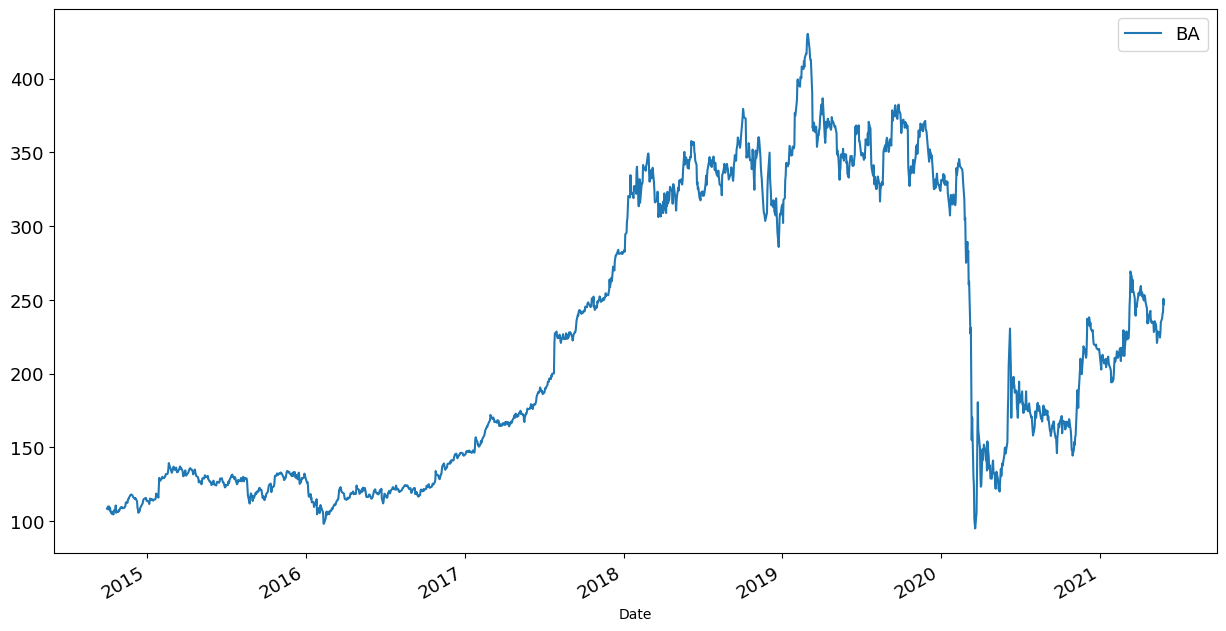

In [40]:
close.BA.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

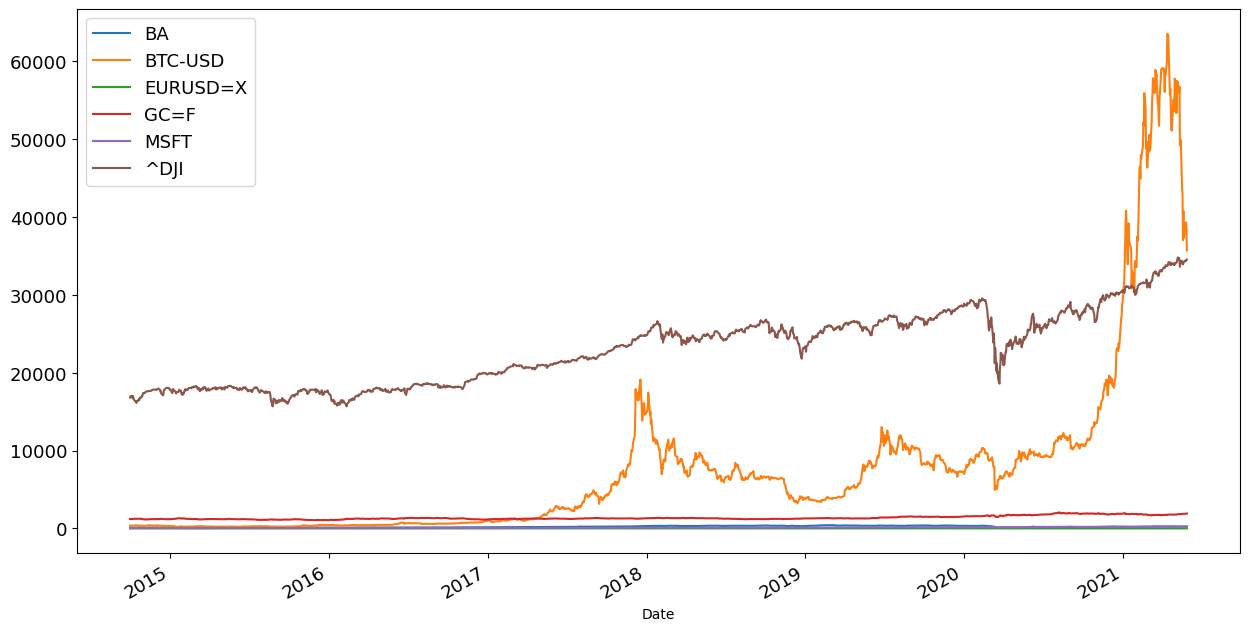

In [38]:
close.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

__Take Home: Absolute Prices are absolutely meaningless/useless (in most cases)__ <br>
- Prices that are on a different scale are hard to compare 
- A higher Price does not imply a higher value or a better performance

## Normalizing Financial Time Series to a Base Value (100)

__-> all instruments start at the very same Level (Base Value)__

In [41]:
close

Ticker,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,108.4067,383.6150,1.2628,1214.6000,39.1670,16804.7109
2014-10-02,107.9719,375.0720,1.2624,1214.2000,39.0475,16801.0508
2014-10-03,109.8762,359.5120,1.2671,1192.2000,39.3291,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,244.2173,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,242.1004,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,242.4596,34529.4492


In [42]:
close.iloc[0,0] # first price BA

108.40667724609376

In [45]:
close.BA.div(close.iloc[0,0]).mul(100)

Date
2014-10-01   100.0000
2014-10-02    99.5990
2014-10-03   101.3556
2014-10-04        NaN
2014-10-05        NaN
               ...   
2021-05-26   222.6523
2021-05-27   231.2588
2021-05-28   227.8642
2021-05-29        NaN
2021-05-30        NaN
Name: BA, Length: 2434, dtype: float64

In [46]:
close.iloc[0] # first Price all tickers

Ticker
BA           108.4067
BTC-USD      383.6150
EURUSD=X       1.2628
GC=F        1214.6000
MSFT          39.1670
^DJI       16804.7109
Name: 2014-10-01 00:00:00, dtype: float64

In [47]:
norm = close.div(close.iloc[0]).mul(100)
norm

Ticker,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
2014-10-02,99.5990,97.7730,99.9672,99.9671,99.6950,99.9782
2014-10-03,101.3556,93.7169,100.3345,98.1558,100.4140,101.2198
2014-10-04,NaN,85.7281,NaN,NaN,NaN,NaN
2014-10-05,NaN,83.5499,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,222.6523,10243.1344,96.9969,156.5371,623.5287,204.2466
2021-05-27,231.2588,10019.6733,96.5495,156.0761,618.1237,205.0892
2021-05-28,227.8642,9305.5815,96.5542,156.6359,619.0410,205.4748


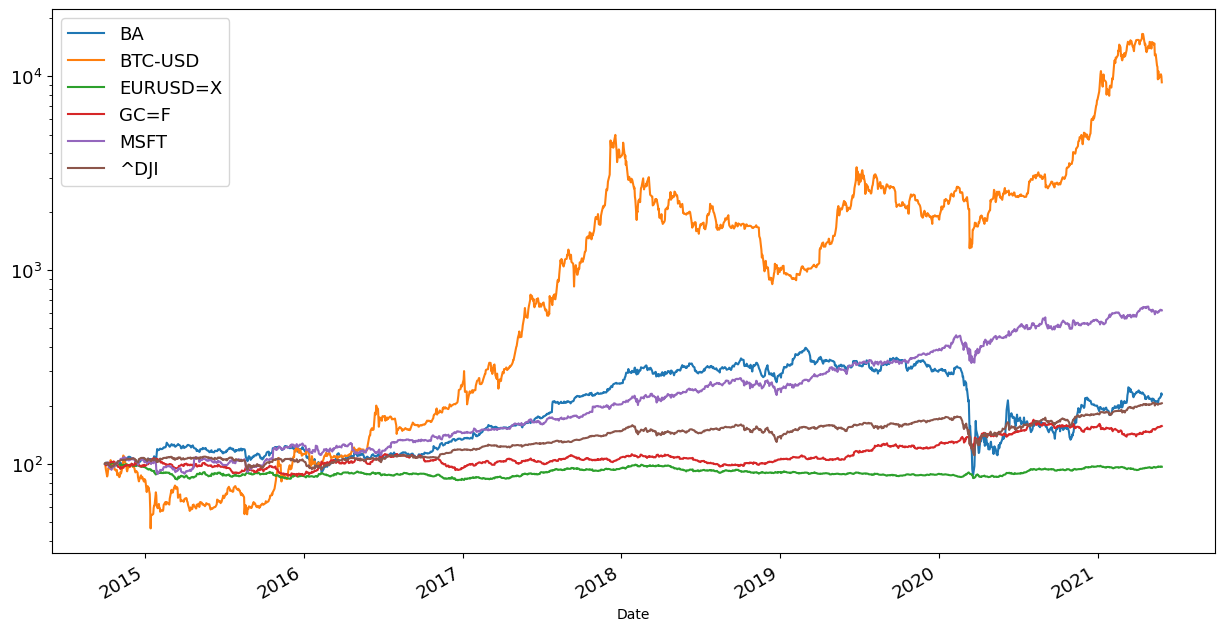

In [50]:
norm.dropna().plot(figsize = (15, 8), fontsize = 13, logy = True)
plt.legend(fontsize = 13)
plt.show()

__Take Home: Normalized Prices help to compare Financial Instruments...<br>
...but they are limited when it comes to measuring/comparing Performance in more detail.__

In [ ]:
close.to_csv("close.csv")

---------------------------------------------

__Coding Challenge #1__

1. Load Stock Price Data for General Electric (GE) and another ticker symbol of your choice from 2015-01-02 until 2020-12-31.<br>
Go to https://finance.yahoo.com/ and get the right ticker symbol. For instruments traded outside the US, you have to add a country/exchange suffix. <br>
Check the suffix list here https://help.yahoo.com/kb/exchanges-data-providers-yahoo-finance-sln2310.html As an example, the suffix for the National Indian Stock Exchange is .NS -> Ticker Symbol for Reliance is Reliance.NS

2. Select Close prices only and create a price chart for GE.

3. Normalize the stock prices for GE and the Ticker Symbol of your choice (Base Value: 1) and visualize! What´s the final normalized price for GE on 2020-12-30? 

_You can find the solution for the Coding Challenges at the end of this notebook_.

-----------------------------------------------------

## Price Changes and Financial Returns

__More meaningful/useful than Prices: Price changes__

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
#plt.style.use("seaborn-v0_8")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
msft = close.MSFT.dropna().to_frame().copy()

In [ ]:
msft

In [ ]:
msft.rename(columns = {"MSFT":"Price"}, inplace = True)

In [ ]:
msft

In [ ]:
msft.shift(periods = 1)

In [ ]:
msft["P_lag1"] = msft.shift(periods = 1)
msft

__Absolute Price Changes__ (Difference)

In [ ]:
msft["P_diff"] = msft.Price.sub(msft.P_lag1) # Alternative 1

In [ ]:
msft

In [ ]:
msft["P_diff2"] = msft.Price.diff(periods = 1)  # Alternative 2

In [ ]:
msft

In [ ]:
msft.P_diff.equals(msft.P_diff2)

__-> Absolute Price Changes are not meaningful__

__Relative/Percentage Price Changes__ (Returns)

In [ ]:
msft.Price.div(msft.P_lag1) - 1 # Alternative 1

In [ ]:
msft["Returns"] = msft.Price.pct_change(periods = 1) # Alternative 2
msft

In [ ]:
46.0900 / 45.7600 - 1

In [ ]:
(46.0900 / 45.7600 - 1) * 100

__Take Home: Relative Price Changes (Returns) are meaningful and comparable across instruments__

In [ ]:
msft.drop(columns = ["P_lag1", "P_diff", "P_diff2"], inplace = True)

In [ ]:
msft

In [ ]:
msft.to_csv("msft.csv")

## Measuring Reward and Risk of an Investment

__General Rule in Finance/Investing: Higher Risk must be rewarded with higher Returns__.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
#plt.style.use("seaborn-v0_8")

In [ ]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

In [ ]:
msft.Price.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

- Reward: Positive Returns
- Risk: Volatility of Returns

In [ ]:
msft.describe()

In [ ]:
mu = msft.Returns.mean() # arithmetic mean return -> Reward
mu

In [ ]:
sigma = msft.Returns.std() # standard deviation of returns -> Risk/Volatility
sigma

In [ ]:
np.sqrt(msft.Returns.var())

----------------------------------------

__Coding Challenge #2__

1. Calculate daily returns for Bitcoin.

2. Calculate the arithmetic mean return and the standard deviation of returns for Bitcoin. 

3. Compare Bitcoin with Microsoft (mu = 0.00116, sigma = 0.01726). Does the rule "Higher Risk -> Higher Reward" hold?

-----------------------------------

## Investment Multiple and CAGR 

__Two alternative reward metrics that are more intuitive and easier to interpret.__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
#plt.style.use("seaborn-v0_8")

In [ ]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

__Investment Multiple__: Ending Value of 1 [Dollar] invested. <br>
Multiple = Ending Value / Initial Investment

In [ ]:
multiple = (msft.Price.iloc[-1] / msft.Price.iloc[0]) # NEW: use iloc[]
multiple

__Price Increase (in %)__

In [ ]:
(multiple - 1) * 100

In [ ]:
msft.Price / msft.Price.iloc[0] # similar/identical concept: Normalized Price with Base Value 1

__Drawback of Investment Multiple: Doesn´t take into account investment Period. Meaningful only in conjunction with Investment Period.__

__Compound Annual Growth Rate (CAGR)__: The (constant annual) rate of return that would be required for an investment to grow from its beginning balance to its ending balance, assuming the profits were reinvested at the end of each year of the investment's lifespan. (Wikipedia)

In [ ]:
start = msft.index[0]
start

In [ ]:
end = msft.index[-1]
end

In [ ]:
td = end - start
td

In [ ]:
td_years = td.days / 365.25
td_years

In [ ]:
cagr = multiple**(1 / td_years) - 1 # short version
cagr

In [ ]:
cagr = (msft.Price.iloc[-1]/msft.Price.iloc[0])**(1/((msft.index[-1] - msft.index[0]).days / 365.25)) - 1 # long
cagr

In [ ]:
(1 + cagr)**(td_years) # alternative #2 to calculate multiple (cagr)

__-> CAGR can be used to compare Investments with different investment horizons.__

## Compound Returns & Geometric Mean Return

In [ ]:
msft

In [ ]:
multiple = (1 + msft.Returns).prod() # alternative #3 to calculate multiple (compounding daily returns)
multiple

In [ ]:
n = msft.Returns.count()
n

In [ ]:
geo_mean = multiple**(1/n) - 1 # Geometric mean return (daily)
geo_mean

In [ ]:
(1 + geo_mean)**n # alternative #4 to calculate multiple (geometric mean)

__-> Compound returns, CAGR & geometric mean return are closely related concepts__.

In [ ]:
mu = msft.Returns.mean() # arithmetic mean return
mu

__The arithmetic mean return is always greater than the geometric mean return... and less useful__. 

In [ ]:
(1 + mu)**n # calculate multiple? not possible with arithmetic mean!

----------------------------

__Coding Challenge #3__

1. Calculate Boeing´s Investment Multiple 

2. Calculate Boeing´s CAGR

3. Calculate Boeing´s Geometric Mean Return

4. Calculate Boeing´s Investment Multiple with compound daily returns

----------------------------------

## Preview: Simple Returns vs. Logarithmic Returns (log returns)

Very often log returns are used instead of simple returns.<br>
- favourable characteristics of log returns
- drawbacks of simple returns

Problem: Many Students / Practitioners feel uncomfortable with log returns. <br>
-> more detailed background on log returns in the next two Lectures (Discrete vs. Continuous Compounding)

## Discrete Compounding

__Annual Compounding__ -> Interests accrue once a year at the end of the year

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __annual compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account once at the end of each year.__

In [ ]:
PV = 100
r = 0.08
n = 1

In [ ]:
100 * 1.08

In [ ]:
FV = PV * (1 + r)**n
FV

In [ ]:
effective_annual_rate = (FV / PV)**(1/n) - 1 
effective_annual_rate

__Quarterly Compounding__ -> Interests accrue once a quarter at the end of the quarter

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __quarterly compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account at the end of each quarter.__

In [ ]:
PV = 100
r = 0.08
n = 1
m = 4

In [ ]:
100 * 1.02 * 1.02 * 1.02 * 1.02

In [ ]:
FV = PV * (1 + r/m)**(n*m)
FV

In [ ]:
effective_annual_rate = (FV / PV)**(1/n) - 1 
effective_annual_rate

__-> Quarterly compounding is favourable (everything else equal) as we earn compound interest (interest on interest).__

__Monthly Compounding__ -> Interests accrue once a month at the end of the month

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __monthly compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account at the end of each month.__

In [ ]:
PV = 100
r = 0.08
n = 1
m = 12

In [ ]:
FV = PV * (1 + r/m)**(n*m)
FV

In [ ]:
effective_annual_rate = ((FV / PV)**(1/n) - 1) 
effective_annual_rate

## Continuous Compounding 

In [ ]:
import numpy as np

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __continuous compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account continuously (infinitely large number of compounding events).__ -> continuous exponential growth that can be observed in nature

In [ ]:
PV = 100
r = 0.08
n = 1
m = 100000 # approx.infinity

In [ ]:
FV = PV * (1 + r/m)**(n*m) # approx. with large m
FV

In [ ]:
FV = PV * np.exp(n * r) # exact math with e (euler number)
FV

In [ ]:
euler = np.exp(1)
euler

In [ ]:
PV * euler**(n * r)

In [ ]:
effective_annual_rate = ((FV / PV)**(1/n) - 1) # Alt 1
effective_annual_rate

In [ ]:
effective_annual_rate = np.exp(r) - 1 # Alt 2
effective_annual_rate

Let´s assume we only observe PV and FV, how to calculate the stated rate/continuously compounded rate of 8%?

In [ ]:
r = np.log(FV / PV) # inverse calculation -> use log (Alt 1)
r

In [ ]:
r = np.log(effective_annual_rate + 1) # inverse calculation -> use log (Alt 2)
r

__Take Home: Prices of traded Financial Instruments change (approx.) continuously. <br>
-> Intuitively, it makes a lot of sense to work with log returns.__ 

## Log Returns

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.6f}'.format

In [ ]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

In [ ]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift()) # daily log returns

In [ ]:
msft

In [ ]:
msft.describe()

In [ ]:
mu = msft.log_ret.mean() # mean log return -> Reward
mu

In [ ]:
sigma = msft.log_ret.std() # standard deviation of log returns -> Risk/Volatility
sigma

## Simple Returns vs Log Returns ( Part 1)

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.6f}'.format

In [ ]:
df = pd.DataFrame(data = [100, 50, 90], columns = ["Price"])
df

In [ ]:
df["SR"] = df.Price.pct_change() # simple returns

In [ ]:
df["LR"] = np.log(df.Price / df.Price.shift()) # log returns

In [ ]:
df

In [ ]:
periods = df.SR.count()
periods

__The arithmetic mean of simple returns can be misleading!__

In [ ]:
mean_sr = df.SR.mean()
mean_sr

In [ ]:
100 * (1 + mean_sr)**periods # wrong!!!

__We should use Compound Simple Returns / Geometric Mean, or even better...__

In [ ]:
geo_mean = (1 + df.SR).prod()**(1 / periods) - 1
geo_mean

In [ ]:
100 * (1 + geo_mean)**periods # correct!!!

__...Log Returns which are additive over time!__

In [ ]:
sum_lr = df.LR.sum()
sum_lr

In [ ]:
100 * np.exp(sum_lr) # correct!!!

In [ ]:
mean_lr = df.LR.mean()
mean_lr

In [ ]:
100 * np.exp(mean_lr * periods) # correct!!!

__Take Home: Log Returns are additive over time. Simple Returns are not additive over time (but they can be multiplied/compounded)__

## Simple Returns vs. Log Returns (Part 2)

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.6f}'.format

In [ ]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])

In [ ]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift())

In [ ]:
msft

__Investment Multiple__

In [ ]:
msft.Returns.add(1).prod() # compounding simple returns ("compound returns")

In [ ]:
np.exp(msft.log_ret.sum())  # adding log returns ("cumulative returns")

__Normalized Prices with Base 1__

In [ ]:
msft.Returns.add(1).cumprod() # compounding simple returns ("compound returns")

In [ ]:
np.exp(msft.log_ret.cumsum()) # adding log returns ("cumulative returns")

In [ ]:
msft.log_ret.cumsum().apply(np.exp) # adding log returns ("cumulative returns")

__CAGR__

In [ ]:
(msft.Price.iloc[-1]/msft.Price.iloc[0])**(1/((msft.index[-1] - msft.index[0]).days / 365.25)) - 1 # use iloc

In [ ]:
trading_days_year = msft.Returns.count() / ((msft.index[-1] - msft.index[0]).days / 365.25)
trading_days_year

In [ ]:
np.exp(msft.log_ret.mean() * trading_days_year) - 1 # correct with mean of daily log returns!

In [ ]:
msft.Returns.mean() * trading_days_year # incorrect with mean of daily simple returns!

In [ ]:
np.exp(msft.log_ret.mean() * 252) - 1 # good approximation (for us stocks)

--------------------------------------------

__Coding Challenge #4__

1. Calculate daily log returns for Boeing.

2. Use Boeing´s log returns to calculate 
- Investment Multiple
- CAGR (assuming 252 trading days)
- Normalized Prices (Base = 1)

---------------------------------------------

## Performance Comparison

__General Rule in Finance/Investing: Higher Risk must be rewarded with higher Returns__.

__Which instrument(s) performed best/worst in the past in terms of risk & return?__

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
close.info()

In [ ]:
close.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
np.log(close / close.shift()).info() # keep NaN

In [ ]:
close.apply(lambda x: np.log(x.dropna() / x.dropna().shift())).info() # remove NaN

In [ ]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

In [ ]:
returns.info()

In [ ]:
returns.describe()

In [ ]:
summary = returns.agg(["mean", "std"]).T
summary

In [ ]:
summary.columns = ["Mean", "Std"]
summary

In [ ]:
summary.plot(kind = "scatter", x = "Std", y = "Mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Std"]+0.00005, summary.loc[i, "Mean"]+0.00005), size = 15)
plt.xlabel("Risk (std)", fontsize = 15)
plt.ylabel("Mean Return", fontsize = 15)
plt.title("Mean-Variance Analysis", fontsize = 20)
plt.show()

-> There is __no clear "best-performer"__ among ["EURUSD=X", "GC=F", "^DJI", "MSFT", "BTC-USD"] (without further analysis). __Higher risk__ is getting rewarded with __higher returns__. __BA underperformed__.

__Take Home: Mean-Variance Analysis has one major shortcoming: It assumes that financial returns follow a Normal Distribution. That´s (typically) not True.<br> -> Standard Deviation of Returns underestimates the true/full risk of an Investment as it fails to measure "Tail Risks".__ 

## Normality of Financial Returns 

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8")

In [ ]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

In [ ]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift()) 
msft

In [ ]:
msft.describe()

In [ ]:
msft.log_ret.plot(kind = "hist", figsize = (15 ,8), bins = 100, fontsize = 15, density = False) # Frequency Distribution of log returns
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Frequency Distribution of Returns", fontsize = 20)
plt.show()

__Do MSFT Returns follow a Normal Distribution?__ <br><br>
A normally distributed random variable can be fully described by its 
- mean
- standard deviation

Higher Central Moments are zero:
- Skew = 0 (measures symmetrie around the mean)
- (Excess) Kurtosis = 0 (positve excess Kurtosis -> more observations in the "tails")

In [ ]:
mu = msft.log_ret.mean()
mu

In [ ]:
sigma = msft.log_ret.std()
sigma

In [ ]:
import scipy.stats as stats

In [ ]:
stats.skew(msft.log_ret.dropna()) # in a Normal Distribution: skew == 0

In [ ]:
stats.kurtosis(msft.log_ret.dropna(), fisher = True) # in a Normal Distribution: (fisher) kurtosis == 0

__-> MSFT Returns exhibit "Fat Tails" (extreme positive/negative outcomes).__

In [ ]:
x = np.linspace(msft.log_ret.min(), msft.log_ret.max(), 10000)
x

In [ ]:
y = stats.norm.pdf(x, loc = mu, scale = sigma) # creating y values a for normal distribution with mu, sigma
y

In [ ]:
plt.figure(figsize = (20, 8))
plt.hist(msft.log_ret, bins = 500, density = True, label = "Frequency Distribution of daily Returns (MSFT)")
plt.plot(x, y, linewidth = 3, color = "red", label = "Normal Distribution")
plt.title("Normal Distribution", fontsize = 20)
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

__-> MSFT Returns exhibit "Fat Tails" (extreme positive/negative outcomes).__ 

__Testing the normality of MSFT Returns based on the sample (Oct 2014 to May 2021):__ <br>
__-> Hypothesis Test with H0 Hypothesis: MSFT Returns (full population) follow a normal Distribution.__ 

In [ ]:
z_stat, p_value = stats.normaltest(msft.log_ret.dropna())

In [ ]:
z_stat # high values -> reject H0

In [ ]:
p_value # low values (close to zero) -> reject H0

In [ ]:
round(p_value, 10)

__-> Assuming that MSFT Returns (generally) follow a Normal Distribution, there is 0% probability that we get that extreme outcomes in a sample.__ 

__Take Home: MSFT Returns don´t follow a Normal Distribution as they exhibit "Fat Tails". Extreme Events/Outcomes are not reflected in the Mean-Variance Analysis. The Standard Deviation of Returns underestimates true Risk.__

## Annualizing Mean Return and Std of Returns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
#plt.style.use("seaborn-v0_8")

In [ ]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"], usecols = ["Date", "Price"])

In [ ]:
msft

In [ ]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift())

In [ ]:
msft.log_ret.agg(["mean", "std"]) # mean and std based on daily returns

In [ ]:
ann_mu = msft.log_ret.mean() * 252 
ann_mu

In [ ]:
cagr = np.exp(ann_mu) - 1 # don´t mix up with cagr
cagr

In [ ]:
ann_std = msft.log_ret.std() * np.sqrt(252) 
ann_std

In [ ]:
ann_std = np.sqrt(msft.log_ret.var() * 252) # annualized std of returns (Alt 2)
ann_std

## Resampling / Smoothing

In [ ]:
msft.Price.plot(figsize = (12, 8))
plt.legend()
plt.show()

In [ ]:
monthly = msft.Price.resample("ME").last() ## resample to monthly (month end)
monthly

In [ ]:
monthly.plot(figsize = (12, 8))
plt.legend()
plt.show()

__How will the Mean-Variance Analysis change with smoothed data?__

In [ ]:
freqs = ["YE", "QE", "ME", "W-FRI", "D"]
periods = [1, 4, 12, 52, 252]
ann_mean = []
ann_std = []

In [ ]:
for i in range(5):
    resamp = msft.Price.resample(freqs[i]).last() # resample
    ann_mean.append(np.log(resamp / resamp.shift()).mean() * periods[i]) # calc. annualized mean
    ann_std.append(np.log(resamp / resamp.shift()).std() * np.sqrt(periods[i])) # calc. annualized std

In [ ]:
ann_mean

In [ ]:
summary = pd.DataFrame(data = {"ann_std":ann_std, "ann_mean":ann_mean}, index = freqs)
summary

In [ ]:
summary.plot(kind = "scatter", x = "ann_std", y = "ann_mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann_std"]+0.001, summary.loc[i, "ann_mean"]+0.001), size = 15)
plt.ylim(0, 0.3)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

__-> Smoothing reduces (observed) Risk__. 

Dubious practices:
- Managing (Manipulating) Performance in Performance Reportings.
- Comparing assets with different granularity and pricing mechanisms -> e.g. non-listed (alternative assets) vs. listed assets 
- Adjusting granularity to investor´s (average) holding period -> Volatility is still there.

## Rolling Statistics

__(Another) general Rule in Finance/Investing: Past performance is not an indicator of future performance__.

In [ ]:
msft

In [ ]:
ann_mu = msft.log_ret.mean() * 252 # annualized mean return
ann_mu

In [ ]:
ann_std = msft.log_ret.std() * np.sqrt(252) # annualized std of returns (Alt 1)
ann_std

__Are Return and Risk constant over time? No, of course not! They change over time.__

__Let´s measure/quantify this with rolling statistics!__

In [ ]:
window = 252 # rolling window 252 trading days (~ 1 Year)

In [ ]:
msft.log_ret.rolling(window = 252)

In [ ]:
msft.log_ret.rolling(window = 252).sum() # Alt 1

In [ ]:
roll_mean = msft.log_ret.rolling(window = 252).mean() * 252 # Alt 2
roll_mean

In [ ]:
roll_mean.iloc[250:]

In [ ]:
roll_mean.plot(figsize = (12, 8))
plt.show()

In [ ]:
roll_std = msft.log_ret.rolling(window = 252).std() * np.sqrt(252)
roll_std

In [ ]:
roll_std.plot(figsize = (12, 8))
plt.show()

In [ ]:
roll_mean.plot(figsize = (12, 8))
roll_std.plot()
plt.show()

__Take Home__: Be careful, you´ll always find (sub-)periods with __low returns & high risk__ and __high returns & low risk__. 

- Analysis Period must be __sufficiently long__ to reduce impact of random noise. <br>
- Analysis Period should be __as short as possible__ and should only include the __latest trends / regimes__.
- Commonly used reporting period: __3 Years / 36 Months__

__Another Example: Simple Moving Average (Prices) - SMA__

In [ ]:
sma_window = 50

In [ ]:
msft.Price.plot(figsize = (12, 8))
msft.Price.rolling(sma_window).mean().plot()
plt.show()

--------------------------------------------

__Coding Challenge #5__

1. Calculate daily log returns for Boeing.

2. Use Boeing´s daily log returns to calculate the annualized mean and annualized std (assume 252 trading days per year).

3. Resample to monthly prices and compare the annualized std (monthly) with the annualized std (daily). Any differences?

4. Keep working with monthly data and calculate/visualize the rolling 36 months mean return (annualized).

---------------------------------------------

## Short Selling / Short Positions (Part 1)

What´s the rational behind short selling an instrument? <br>
__-> making profits/positive returns when prices fall.__

__Stocks Example:__

Today an Investor __buys__ the ABC Stock for USD 100. One day later he __sells__ the stock for USD 110. <br> 
__-> Profit: USD 10__ <br>
->__Long Position__ (benefit from rising prices):

Today an Investor __borrows__ the ABC Stock from another Investor and __sells__ it for USD 100. One day later he __buys__ the stock for USD 90 and __returns__ it to the lender.<br>
__-> Profit: USD 10__  <br>
->__Short Position__ (benefit from falling prices):

In some countries (and for some instruments like stocks) short selling is prohibited. <br>
Most intuitive/popular use case for short selling: __Currencies (Forex)__

## Short Selling / Short Positions (Part 2)

__EUR/USD__ ("Long Euro" == "Short USD")

In [ ]:
t0 = 1.10
t1 = 1.25

Today an Investor __buys__ EUR 1 and pays USD 1.10. One day later he __sells__ EUR 1 for USD 1.25 <br>
__-> Profit: USD 0.15__  <br>
->__Long Position Euro__ (benefit from rising EUR prices):

In [ ]:
t1 / t0 - 1 # The EUR appreciates by 13.64% relative to USD (simple return)

-> EUR __Long__ Position returns __+13.64%__ (simple return) 

What return would you expect for the corresponding EUR __Short__ position? That´s a "no brainer": __-13.64%__, right? 

__Surprisingly, that´s incorrect!!!__

Inverse Rate: __USD/EUR__ ("Short Euro" == "Long USD")

In [ ]:
t0 = 1 / 1.10
t1 = 1 / 1.25

In [ ]:
print(t0, t1)

Today an Investor __buys__ USD 1 and pays 0.9091 Euro. One day later he __sells__ USD 1 for EUR 0.8 __<br>
-> Loss: EUR 0.1091__  <br>

In [ ]:
t1 / t0 - 1 # The USD depreciates by 12.0% relative to EUR

-> EUR __Short__ Position returns __-12.0%__ (simple return)

__Take Home: When using simple returns, long position return != short position return * (-1)__ <br>
__-> Use log returns!__

## Short Selling / Short Positions (Part 3)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
#plt.style.use("seaborn-v0_8")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
close["USDEUR=X"] = 1/close["EURUSD=X"]

In [ ]:
close

In [ ]:
fx = close[["EURUSD=X", "USDEUR=X"]].dropna().copy()

In [ ]:
fx

In [ ]:
fx.plot(figsize = (12,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
simple_ret = fx.pct_change() # simple returns
simple_ret

In [ ]:
simple_ret.add(1).prod() - 1 # compound simple returns

__-> For simple returns: long position returns != short position returns * (-1)__

In [ ]:
log_ret = np.log(fx / fx.shift()) # log returns
log_ret

In [ ]:
log_ret.sum() # cumulative log returns

__-> For log returns: long position returns == short position returns * (-1)__

In [ ]:
norm_fx = log_ret.cumsum().apply(np.exp) # normalized prices (Base 1)
norm_fx

In [ ]:
norm_fx.iloc[0] = [1, 1]

In [ ]:
norm_fx

In [ ]:
norm_fx.plot(figsize = (12,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

--------------------------------------------

__Coding Challenge #6__

1. Calculate daily log returns for Boeing.

2. Calculate the annualized mean and annualized std (assume 252 trading days per year) for a short position in Boeing (ignore Trading and Borrowing Costs).

---------------------------------------------

## Covariance and Correlation

Do instruments/assets __move together__ (and to what extent)? <br>

Three cases:
- unrelated (__no__ relationship/correlation)
- moving together (__positive__ relationship/correlation)
- moving in opposite directions (__negative__ relationship/correlation) 

__-> Correlation between instruments/assets play an important role in portfolio management.__

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
close["USDEUR=X"] = 1/close["EURUSD=X"]
close

In [ ]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

In [ ]:
returns.cov() # covariance (hard to interpret)

In [ ]:
returns.corr() # correlation coefficient (easy to interpret)

Three cases:
- no correlation: __correlation coefficient == 0__
- moving together: __0 < correlation coefficient <= 1__ (positive)
- moving in opposite directions: __-1 <= correlation coefficient < 0__ (negative)

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(returns.corr(), cmap = "RdYlBu_r", annot = True, annot_kws={"size":15}, vmin = -1, vmax = 1)
plt.show()

__Take Home: Similar assets are (highly) positive correlated. Different assets exhibit low/no/negative correlation.__ <br>
-> In portfolio management it´s beneficial to have assets with low/no/negative correlation (portfolio diversification effect).

## Portfolio of Assets and Portfolio Returns

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
prices = pd.DataFrame(data = {"Asset_A": [100, 112], "Asset_B":[100, 104]}, index = [0, 1])
prices

In [ ]:
prices["Total"] = prices.Asset_A + prices.Asset_B

In [ ]:
prices

In [ ]:
returns = prices.pct_change() # simple returns
returns

In [ ]:
0.5 * 0.12 + 0.5 * 0.04 # correct (portfolio return == weighted average of simple returns)

In [ ]:
log_returns = np.log(prices / prices.shift()) # log returns
log_returns

In [ ]:
0.5 * log_returns.iloc[1,0] + 0.5 * log_returns.iloc[1,1] # incorrect (portfolio return != weighted average of log returns)

__Take Home: While log returns are time-additive, they are not asset-additive.__ <br>
(While simple returns are not time-additive, they are asset-additive.)

## Margin Trading & Levered Returns (Part 1)

__Definition__: "Margin trading refers to the practice of using __borrowed funds__ from a broker to trade a financial asset, which forms the collateral for the loan from the broker." (Investopedia.com) 

In Simple Words: Investors __don´t pay the full price__ but they get the full benefit (less borrowing costs).

It´s a two edged sword: Leverage __amplifies both gains and losses__. <br> In the event of a loss, the collateral gets reduced and the Investor either posts additional margin or the brokers closes the position.

__Example__

A Trader buys a stock (stock price: 100) __on margin (50%)__. After one day the price increases to 110.<br>
Calculate __unlevered return__ and __levered return__.

In [ ]:
P0 = 100
P1 = 90
leverage = 2
margin = P0/2

In [ ]:
margin

In [ ]:
unlev_return = (P1 - P0) / P0 # simple return
unlev_return

In [ ]:
lev_return = (P1 - P0) / margin # simple return 
lev_return

In [ ]:
lev_return == unlev_return * leverage # this relationship is true for simple returns...

In [ ]:
unlev_return = np.log((P1 - P0) / P0 + 1) # log return
unlev_return

In [ ]:
lev_return = np.log((P1 - P0) / margin + 1) # log return
lev_return

In [ ]:
lev_return == unlev_return * leverage # this relationship does not hold for log returns...

__Take Home: To calculate levered returns, don´t multiply leverage with log returns!__

## Margin Trading & Levered Returns (Part 2)

__Hypothesis: For (highly) profitable Investment: The more leverage, the better?__

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8")

In [ ]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

In [ ]:
msft["Simple_Ret"] = msft.Price.pct_change() # simple returns

In [ ]:
leverage = 2

(Simplified) __Assumptions__:
- Restore leverage on a daily basis (by buying/selling shares)
- no trading costs
- no borrowing costs

In [ ]:
msft["Lev_Returns"] = msft.Returns.mul(leverage) # levered simple returns
msft

In [ ]:
msft["Lev_Returns"] = np.where(msft["Lev_Returns"] < -1, -1, msft["Lev_Returns"])

In [ ]:
msft

In [ ]:
msft[["Returns", "Lev_Returns"]].add(1).cumprod().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
msft.Simple_Ret.max()

In [ ]:
msft.Lev_Returns.max()

In [ ]:
msft.Simple_Ret.min()

In [ ]:
msft.Lev_Returns.min()

__What happens when leverage greater than...?__

In [ ]:
-1 / msft.Simple_Ret.min()

__Take Home:__
1. With Leverage you can (theoretically) __lose more than the initial Margin__ (in practice: margin call / margin closeout before)
2. Even for (highly) profitable instruments: __"The more leverage the better" does not hold__.
3. It´s a two edged (__non-symmetrical__) sword: __Leverage amplifies losses more than it amplifies gains__.

--------------------------------

__Coding Challenge #7__

1. Calculate levered returns for Bitcoin (leverage = 4). 

2. Visualize and compare with unlevered Investment.

3. Some Traders trade Bitcoin with extremely high leverage (> 100). Do you think this is a good idea (assuming no additional/advanced Risk Management Tools)?

---------------------------------------------

--------------------------------------

## Coding Challenge Solutions

__Coding Challenge #1__

1. Load Stock Price Data for General Electric (GE) and another ticker symbol of your choice from 2015-01-02 until 2020-12-31.<br>
Go to https://finance.yahoo.com/ and get the right ticker symbol. For instruments traded outside the US, you have to add a country/exchange suffix. <br>
Check the suffix list here https://help.yahoo.com/kb/exchanges-data-providers-yahoo-finance-sln2310.html As an example, the suffix for the National Indian Stock Exchange is .NS -> Ticker Symbol for Reliance is Reliance.NS

2. Select Close prices only and create a price chart for GE.

3. Normalize the stock prices for GE and the Ticker Symbol of your choice (Base Value: 1) and visualize! What´s the final normalized price for GE on 2020-12-30? 

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
#plt.style.use("seaborn-v0_8")

In [ ]:
start = "2015-01-02"
end = "2020-12-31"
symbol = ["GE", "Reliance.NS"]

In [ ]:
df = yf.download(symbol, start, end)
df

In [ ]:
close = df.Close.copy()
close

In [ ]:
close.GE.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
norm = close.div(close.iloc[0]).mul(1)
norm

-> The final normalized Price is 0.4445.

In [ ]:
norm.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

__Coding Challenge #2__

1. Calculate daily returns for Bitcoin.

2. Calculate the arithmetic mean return and the standard deviation of returns for Bitcoin. 

3. Compare Bitcoin with Microsoft (mu = 0.00116, sigma = 0.01726). Does the rule "Higher Risk -> Higher Reward" hold?

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
btc = close["BTC-USD"].dropna().to_frame().copy()
btc

In [ ]:
btc["Returns"] = btc.pct_change(periods = 1)
btc

In [ ]:
btc

In [ ]:
mu = btc.Returns.mean() 
mu

In [ ]:
sigma = btc.Returns.std()
sigma

In [ ]:
mu > 0.00116

In [ ]:
sigma > 0.01726

Does the rule "Higher Risk -> Higher Reward" hold? -> Yes

__Coding Challenge #3__

1. Calculate Boeing´s Investment Multiple 

2. Calculate Boeing´s CAGR

3. Calculate Boeing´s Geometric Mean Return

4. Calculate Boeing´s Investment Multiple with compound daily returns

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
ba = close["BA"].dropna().to_frame().copy()
ba

In [ ]:
ba["Returns"] = ba.pct_change(periods = 1)
ba

In [ ]:
multiple = ba.BA.iloc[-1] / ba.BA.iloc[0]
multiple

In [ ]:
cagr = (ba.BA.iloc[-1]/ba.BA.iloc[0])**(1/((ba.index[-1] - ba.index[0]).days / 365.25)) - 1 
cagr

In [ ]:
n = ba.Returns.count()
n

In [ ]:
geo_mean = (1 + ba.Returns).prod()**(1/n) - 1 
geo_mean

In [ ]:
multiple = ba.Returns.add(1).prod()
multiple

__Coding Challenge #4__

1. Calculate daily log returns for Boeing.

2. Use Boeing´s log returns to calculate 
- Investment Multiple
- CAGR (assuming 252 trading days)
- Normalized Prices (Base = 1)

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
ba = close["BA"].dropna().to_frame().copy()
ba

In [ ]:
ba["log_ret"] = np.log(ba / ba.shift())
ba

In [ ]:
multiple = np.exp(ba.log_ret.sum())
multiple

In [ ]:
cagr = np.exp(ba.log_ret.mean() * 252) - 1
cagr

In [ ]:
norm = ba.log_ret.cumsum().apply(np.exp)
norm

__Coding Challenge #5__

1. Calculate daily log returns for Boeing.

2. Use Boeing´s daily log returns to calculate the annualized mean and annualized std (assume 252 trading days per year).

3. Resample to monthly prices and compare the annualized std (monthly) with the annualized std (daily). Any differences?

4. Keep working with monthly data and calculate/visualize the rolling 36 months mean return (annualized).

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
ba = close["BA"].dropna().to_frame().copy()
ba

In [ ]:
ba["log_ret"] = np.log(ba / ba.shift())
ba

In [ ]:
ann_mu = ba.log_ret.mean() * 252 
ann_mu

In [ ]:
ann_std = ba.log_ret.std() * np.sqrt(252) 
ann_std

In [ ]:
monthly = ba.BA.resample("ME").last().to_frame()
monthly

In [ ]:
monthly["Returns"] = np.log(monthly / monthly.shift())
monthly

In [ ]:
ann_std = monthly.Returns.std() * np.sqrt(12) 
ann_std

-> Risk (monthly) slighly lower than Risk (daily) 

In [ ]:
window = 36

In [ ]:
roll_mean = monthly.Returns.rolling(window = window).mean() * 12
roll_mean

In [ ]:
roll_mean.plot(figsize = (12, 8))
plt.show()

__Coding Challenge #6__

1. Calculate daily log returns for Boeing.

2. Calculate the annualized mean and annualized std (assume 252 trading days per year) for a short position in Boeing (ignore Trading and Borrowing Costs).

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
ba = close["BA"].dropna().to_frame().copy()
ba

In [ ]:
ba["log_ret"] = np.log(ba / ba.shift())
ba

In [ ]:
ba["short"] = ba.log_ret * (-1)
ba

In [ ]:
ann_mean = ba.short.mean() * 252 # equal to ann_mean of long position * (-1)
ann_mean

In [ ]:
ann_std = ba.short.std() * np.sqrt(252) # same as ann_std of long position
ann_std

__Coding Challenge #7__

1. Calculate levered returns for Bitcoin (leverage = 4). 

2. Visualize and compare with unlevered Investment.

3. Some Traders trade Bitcoin with extremely high leverage (> 100). Do you think this is a good idea (assuming no additional/advanced Risk Management Tools)?

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
btc = close["BTC-USD"].dropna().to_frame().copy()
btc

In [ ]:
btc["Returns"] = btc.pct_change(periods = 1)
btc

In [ ]:
leverage = 4

In [ ]:
btc["Lev_Returns"] = btc.Returns.mul(leverage) # levered simple returns
btc

In [ ]:
btc["Lev_Returns"] = np.where(btc["Lev_Returns"] < -1, -1, btc["Lev_Returns"])

In [ ]:
btc[["Returns", "Lev_Returns"]].add(1).cumprod().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

-> Trading Bitcoin with (high) leverage requires advanced risk monitoring/management. Otherwise, a complete loss is very likely (sooner or later...).